# SC2008 Lab4

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import json
import requests


format = [ "type", "sflow_agent_address", "inputPort", "outputPort", "src_MAC",
        "dst_MAC", "ethernet_type", "in_vlan", "out_vlan", "src_IP", "dst_IP",
        "IP_protocol", "ip_tos", "ip_ttl", "src_transport_port", "dst_transport_port",
        "tcp_flags", "packet_size", "IP_size", "sampling_rate", '???'] ##??? to represent the empty column U in the excel sheet]

## Insertion of Data

In [2]:
data_df = pd.read_csv('Data_3.csv', header = None, names = format)
data_df.drop('???', axis = 1, inplace = True) #Dropping columns with null value
data_df

,type,sflow_agent_address,inputPort,outputPort,src_MAC,dst_MAC,ethernet_type,in_vlan,out_vlan,src_IP,dst_IP,IP_protocol,ip_tos,ip_ttl,src_transport_port,dst_transport_port,tcp_flags,packet_size,IP_size,sampling_rate
0,FLOW,203.30.38.251,137,200,d404ff55fd4d,80711fc76001,0x0800,919,280,130.246.176.22,140.115.32.81,6,0x00,50,51216,23505,0x10,1518,1500,2048
1,FLOW,203.30.38.251,129,193,609c9f851b00,0031466b23cf,0x0800,11,919,155.69.160.32,64.233.188.128,6,0x00,56,23159,80,0x10,74,52,2048
2,FLOW,203.30.38.251,137,200,d404ff55fd4d,80711fc76001,0x0800,919,280,130.246.176.53,140.115.32.83,6,0x00,50,50041,20739,0x10,1518,1500,2048
3,FLOW,203.30.38.251,129,135,609c9f851b00,002688cd5fc7,0x0800,11,919,155.69.160.32,54.169.174.79,17,0x00,120,54241,26510,0x10,116,94,2048
4,FLOW,203.30.38.251,130,199,00239cd087c1,544b8cf9a7df,0x0800,919,600,137.132.228.15,193.62.192.8,6,0x00,56,53923,34262,0x10,70,52,2048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69365,FLOW,203.30.38.251,258,199,204e71cf1b0f,ccef48570144,0x0800,537,601,207.241.228.157,210.48.222.9,6,0x00,56,443,57434,0x10,1522,1500,2048
69366,FLOW,203.30.38.251,131,193,00a742233e9e,0031466b23cf,0x0800,43,919,192.122.131.36,216.58.203.234,6,0x00,121,4920,443,0x10,1442,1420,2048
69367,FLOW,203.30.38.251,130,199,00239cd087c1,544b8cf9a7df,0x0800,919,600,137.132.228.15,193.62.192.8,6,0x00,56,34153,3123,0x10,82,64,2048
69368,FLOW,203.30.38.251,129,193,609c9f851b00,0031466b23cf,0x0800,11,919,155.69.196.9,74.125.56.6,17,0x00,58,56221,60786,0x10,1267,1245,2048


## Exercise 4A:  Top Talkers and Listeners

In [3]:
#Function to find Organisation Given IP
def find_organisation(ip_address):
    url = f"http://ip-api.com/json/{ip_address}?fields=4255743"
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        org = data.get('org')
        if org == "":
            org = data.get('as')
        return org
    except requests.exceptions.RequestException as e:
        print(f"Error occurred: {e}")
        return None

### Top 5 Talkers

In [4]:
#Top 5 unique IP addresses sorted by number of packet sent (Top 5 talkers)
top5talkers_df = data_df['src_IP'].value_counts().nlargest(5).to_frame()

top5talkers_df = top5talkers_df.reset_index() 
top5talkers_df.rename(columns={'index': 'IP_Address', 'src_IP': 'Number of Packets'}, inplace=True)
top5talkers_df['Organisation'] = top5talkers_df['IP_Address'].apply(find_organisation)

top5talkers_df

,IP_Address,Number of Packets,Organisation
0,193.62.192.8,3041,European Bioinformatics Institute
1,155.69.160.32,2975,Nanyang Technological University
2,130.14.250.11,2604,National Library of Medicine
3,14.139.196.58,2452,Indian Institute of Technology
4,140.112.8.139,2056,AS17716 National Taiwan University


### Top 5 Listeners

In [5]:
#Top 5 unique IP addresses sorted by number of packet sent (Top 5 Listeners)
top5listeners_df = data_df['dst_IP'].value_counts().nlargest(5).to_frame()

top5listeners_df = top5listeners_df.reset_index() 
top5listeners_df.rename(columns={'index': 'IP_Address', 'dst_IP': 'Number of Packets'}, inplace=True)
top5listeners_df['Organisation'] = top5listeners_df['IP_Address'].apply(find_organisation)

top5listeners_df

,IP_Address,Number of Packets,Organisation
0,103.37.198.100,3841,A*STAR
1,137.132.228.15,3715,National University of Singapore
2,202.21.159.244,2446,Rpnet
3,192.101.107.153,2368,"Battelle Memorial Institute, Pacific Northwest..."
4,103.21.126.2,2056,Indian Institute of Technology Bombay


## Exercise 4B: Transport Protocol

In [6]:
tprotocol_df = data_df['IP_protocol'].value_counts().to_frame()
tprotocol_df = tprotocol_df.reset_index().rename(columns={'index':'Header Value (Type of IP Protocol)', 'IP_protocol':'Number of Packets'})

proportion = []

for i in range(len(tprotocol_df)):
    proportion.append(tprotocol_df['Number of Packets'][i] * 100/len(data_df))
    
tprotocol_df['%'] = proportion
tprotocol_df

,Header Value (Type of IP Protocol),Number of Packets,%
0,6,56064,80.818798
1,17,9462,13.639902
2,50,1698,2.447744
3,0,1261,1.817789
4,47,657,0.947095
5,41,104,0.149921
6,1,74,0.106674
7,381,45,0.064870
8,58,4,0.005766
9,103,1,0.001442


### Proportion of TCP and UDP packets


In [7]:
#Header Value 6 == TCP
#Header Value 17 == UDP
UDP = tprotocol_df[tprotocol_df['Header Value (Type of IP Protocol)'] == 17]
TCP = tprotocol_df[tprotocol_df['Header Value (Type of IP Protocol)'] == 6]

tframe = [TCP, UDP]
combined_df = pd.concat(tframe)
combined_df

,Header Value (Type of IP Protocol),Number of Packets,%
0,6,56064,80.818798
1,17,9462,13.639902


## Exercise 4C: Application Protocol

In [8]:
#Top 5 used application protocol
application_df = data_df['dst_transport_port'].value_counts().nlargest(5).to_frame()
application_df = application_df.reset_index().rename(columns={'index':'Destination Port', 'dst_transport_port':'Number of Packets'})

port_mapping = {45512: 'Unassigned', 
                443: 'HTTPS',
                80: 'HTTP',
                52866: 'Dynamic/Private Ports',
                56152: 'Dynamic/Private Ports',
                0: 'Reserved Port'}

service = []

for i in application_df['Destination Port']:
    try:
        service.append(port_mapping[i])
    except:
        service.append('Unknown')

application_df['Service'] = service
application_df

,Destination Port,Number of Packets,Service
0,443,13423,HTTPS
1,80,2647,HTTP
2,52866,2068,Dynamic/Private Ports
3,45512,1356,Unassigned
4,56152,1341,Dynamic/Private Ports


## Exercise 4D: Traffic

In [12]:
total_traffic = sum(data_df['IP_size'])

total_traffic_Mb = (total_traffic*2048)/(pow(2,20))

print(f"Total Traffic in MB = {total_traffic_Mb:.3f} MB")


Total Traffic in MB = 126519.184 MB


## Exercise 4E: Additional Analysis

### Top 5 Communication Pairs

In [10]:
# Top 5 unique communication pairs
top5cp_df = data_df.groupby(['src_IP', 'dst_IP']).size().sort_values(ascending = False).to_frame()
top5cp_df.columns = ['No. of Packets']
top5cp_df = top5cp_df.reset_index()
top5cp_df=top5cp_df.head(5)

top5cp_df['Source Organisation'] = top5cp_df['src_IP'].apply(find_organisation)
top5cp_df['Destination Organisation'] = top5cp_df['dst_IP'].apply(find_organisation)

top5cp_df = top5cp_df[['src_IP', 'Source Organisation', 'dst_IP', 'Destination Organisation', 'No. of Packets']]
top5cp_df

,src_IP,Source Organisation,dst_IP,Destination Organisation,No. of Packets
0,193.62.192.8,European Bioinformatics Institute,137.132.228.15,National University of Singapore,3041
1,130.14.250.11,National Library of Medicine,103.37.198.100,A*STAR,2599
2,14.139.196.58,Indian Institute of Technology,192.101.107.153,"Battelle Memorial Institute, Pacific Northwest...",2368
3,140.112.8.139,AS17716 National Taiwan University,103.21.126.2,Indian Institute of Technology Bombay,2056
4,137.132.228.15,National University of Singapore,193.62.192.8,European Bioinformatics Institute,1910


### Visualization of top 5 communications pairs between different IP hosts

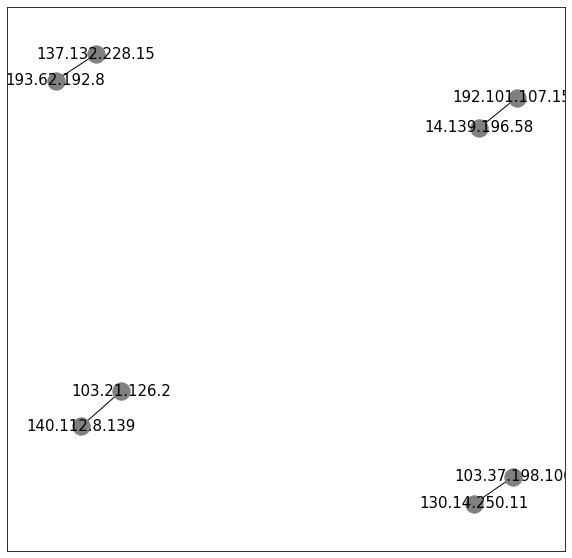

In [78]:
# Group data_df by source and destination IP addresses
communication_dataset = data_df.groupby([data_df["src_IP"], data_df["dst_IP"]]).size().nlargest(5).sort_values(ascending=False)


# Create an empty DataFrame to store communication pairs
communication_dataframe = pd.DataFrame()

# Extract source and destination IP addresses from the grouped dataset
sources = []
destinations = []
for (source_ip, dest_ip), count in communication_dataset.items():
    sources.append(source_ip)
    destinations.append(dest_ip)

# Assign source and destination IP addresses to DataFrame columns
communication_dataframe["source"] = sources
communication_dataframe["destination"] = destinations

# Create a network graph from DataFrame edges
graph = nx.from_pandas_edgelist(communication_dataframe, "source", "destination")

# Visualize the network graph
plt.figure(figsize=(10,10))
graph_positions = nx.spring_layout(graph)
nx.draw_networkx_nodes(graph, graph_positions, node_color="grey")
nx.draw_networkx_edges(graph, graph_positions)
nx.draw_networkx_labels(graph, graph_positions, font_size=15)

plt.show()